In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
data = pd.read_csv('dataset/tweets-sentiment.csv')
data = data[['text','sentiment']]
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [3]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(data,test_size = 0.1)
data_prep = train[train.sentiment != "Neutral"]

In [4]:
train_positive = data_prep[ data_prep['sentiment'] == 'Positive']
train_positive = train_positive['text']
train_negative = data_prep[ data_prep['sentiment'] == 'Negative']
train_negative = train_negative['text']

In [5]:
def wc_draw(datas, color = 'black'):
    words = ' '.join(datas)
    cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
    words = WordCloud(stopwords=STOPWORDS,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(words)
    plt.axis('off')
    plt.show()

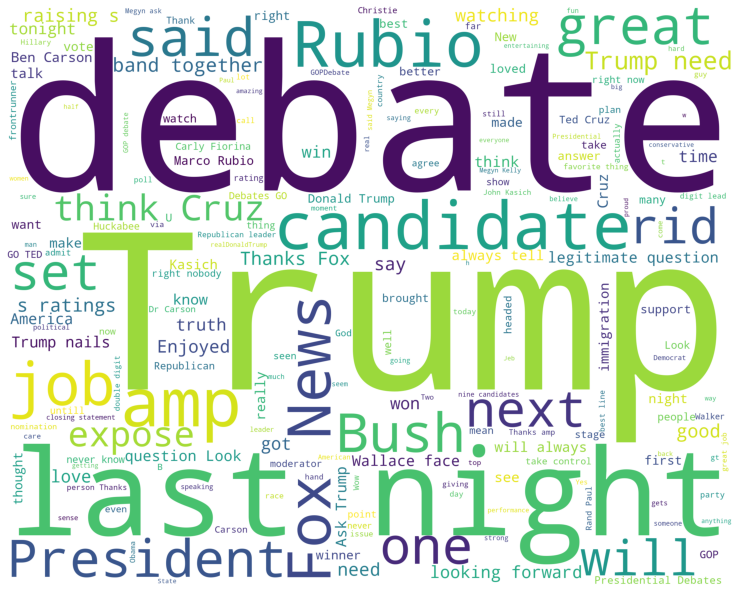

In [6]:
wc_draw(train_positive,'white')

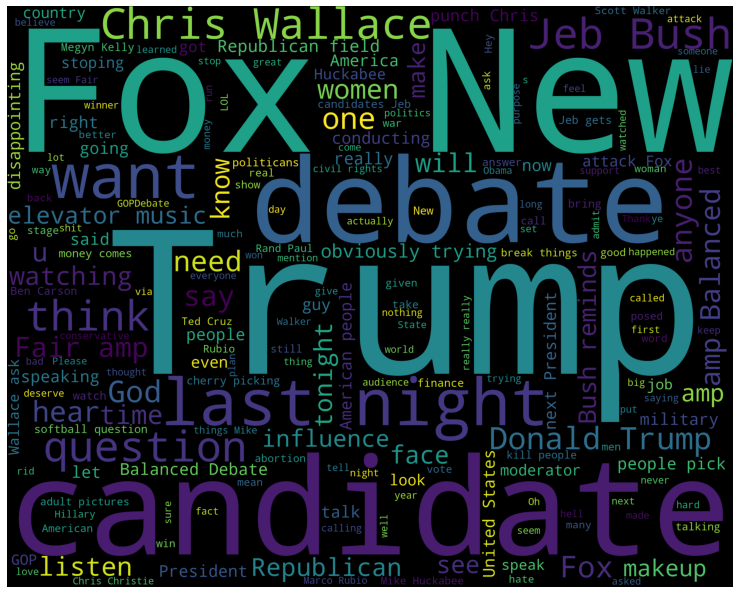

In [7]:
wc_draw(train_negative)

In [8]:
tweets = []
stopwords = set(stopwords.words("english"))
for index, row in train.iterrows():
    filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    cleaned = [word for word in filtered if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT']
    words_without_stopwords = [word for word in cleaned if not word in stopwords]
    tweets.append((words_without_stopwords, row.sentiment))

In [9]:
test_positive = test[ test['sentiment'] == 'Positive']
test_positive = test_positive['text']
test_negative = test[ test['sentiment'] == 'Negative']
test_negative = test_negative['text']

In [11]:
def take_words_from_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

In [12]:
def word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
words_feature = word_features(take_words_from_tweets(tweets))

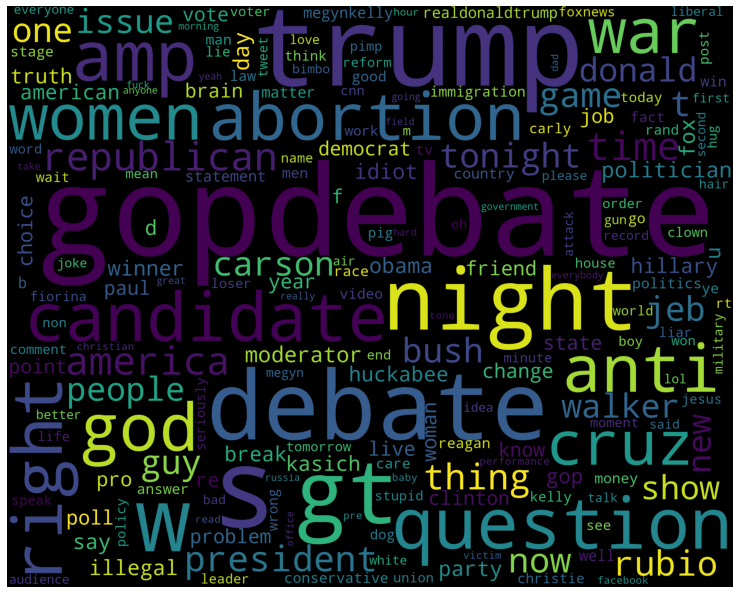

In [13]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in words_feature:
        features['contains(%s)' % word] = (word in document_words)
    return features
wc_draw(words_feature)

In [14]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [15]:
positive_count = 0
negative_count = 0
for obj in test_positive: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        positive_count = positive_count + 1
for obj in test_negative: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        negative_count = negative_count + 1
print('[Positive]: %s/%s '  % (len(test_positive),positive_count))          
print('[Negative]: %s/%s '  % (len(test_negative),negative_count))        

[Positive]: 246/79 
[Negative]: 843/740 
